In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.__version__

'2.10.0'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory("veri_seti/egitim_seti",target_size=(64,64),batch_size=3,class_mode='binary')

Found 94 images belonging to 2 classes.


In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory("veri_seti/test_seti",target_size=(64,64),batch_size=3,class_mode='binary')

Found 26 images belonging to 2 classes.


In [5]:
cnn=tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=3,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=3,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
cnn.fit(x=training_set,validation_data=test_set,epochs=10)

Epoch 1/10
32/32 [==============================] - 6s 140ms/step - loss: 0.6499 - accuracy: 0.5957 - val_loss: 0.9153 - val_accuracy: 0.5385
Epoch 2/10
32/32 [==============================] - 4s 113ms/step - loss: 0.6584 - accuracy: 0.6489 - val_loss: 0.6842 - val_accuracy: 0.5385
Epoch 3/10
32/32 [==============================] - 3s 103ms/step - loss: 0.6194 - accuracy: 0.6489 - val_loss: 0.7459 - val_accuracy: 0.5385
Epoch 4/10
32/32 [==============================] - 3s 106ms/step - loss: 0.5649 - accuracy: 0.7234 - val_loss: 0.9133 - val_accuracy: 0.5385
Epoch 5/10
32/32 [==============================] - 4s 112ms/step - loss: 0.5927 - accuracy: 0.7234 - val_loss: 0.7210 - val_accuracy: 0.5385
Epoch 6/10
32/32 [==============================] - 4s 122ms/step - loss: 0.5426 - accuracy: 0.7553 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 3s 107ms/step - loss: 0.5227 - accuracy: 0.7872 - val_loss: 0.6572 - val_accuracy: 0.6154
Epoch 

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [18]:
test_image=image.load_img("veri_seti/tahmin_foto/tahmin_5.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
sonuc=cnn.predict(test_image)
training_set.class_indices
if sonuc[0][0]==0:
    prediction="alina"
else:
    prediction="digerleri"
print(prediction)

1/1 [==============================] - 0s 27ms/step
digerleri


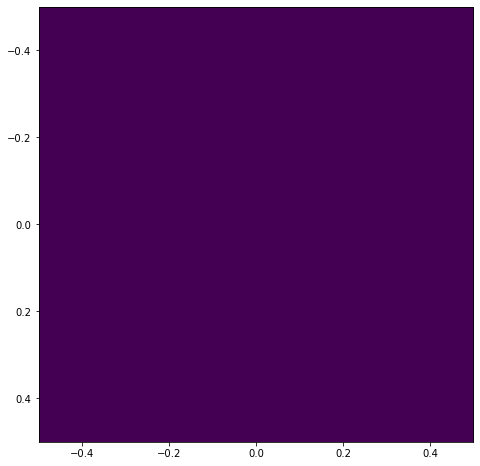

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(sonuc)